<a href="https://colab.research.google.com/github/angelmorales2621-gif/simulaci-n2/blob/main/Browniano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

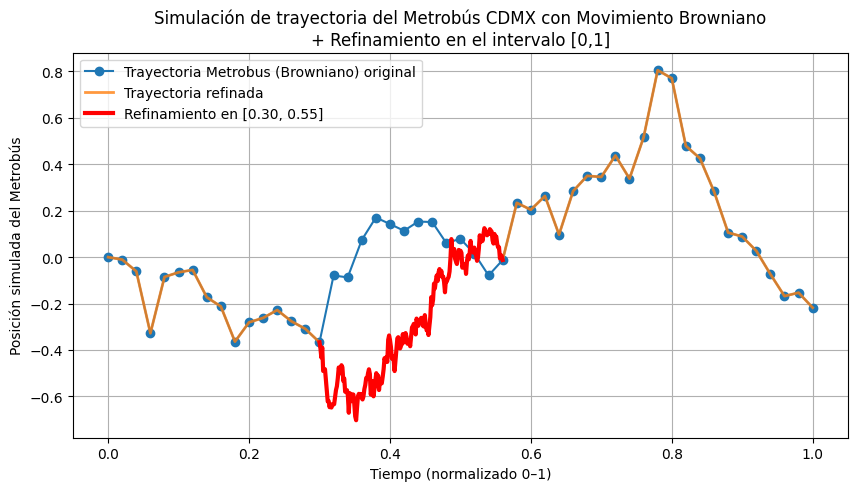

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#     MOVIMIENTO BROWNIANO

def brownian_motion(n_steps):
    """Genera un movimiento browniano estándar en [0,1] con n_steps."""
    dt = 1 / n_steps
    increments = np.sqrt(dt) * np.random.randn(n_steps)
    path = np.concatenate(([0], np.cumsum(increments)))
    t = np.linspace(0, 1, n_steps + 1)
    return t, path

def brownian_refinement(t, path, a, b, refine_steps):
    """
    Refinar la trayectoria entre t=a y t=b usando un puente browniano.
    """
    # Índices del intervalo a refinar
    i_start = np.searchsorted(t, a)
    i_end = np.searchsorted(t, b)

    # Valores originales
    t_start, t_end = t[i_start], t[i_end]
    x_start, x_end = path[i_start], path[i_end]

    # Nuevo grid refinado
    t_refined = np.linspace(t_start, t_end, refine_steps + 1)
    dt = (t_end - t_start) / refine_steps

    # Generamos incrementos brownianos dentro del subintervalo
    increments = np.sqrt(dt) * np.random.randn(refine_steps)
    x_refined = np.concatenate(([x_start], x_start + np.cumsum(increments)))

    # Ajustamos para que cumpla con el valor final (puente browniano)
    x_refined += (x_end - x_refined[-1]) * (t_refined - t_start) / (t_end - t_start)

    # Reconstruir trayectoria completa
    t_new = np.concatenate((t[:i_start], t_refined, t[i_end+1:]))
    x_new = np.concatenate((path[:i_start], x_refined, path[i_end+1:]))

    return t_new, x_new, t_refined, x_refined


# Generar Movimiento Browniano base

n_steps = 50
t, x = brownian_motion(n_steps)

# Intervalo para refinar
a, b = 0.30, 0.55
refine_steps = 200

# Refinamiento
t_new, x_new, t_refined, x_refined = brownian_refinement(t, x, a, b, refine_steps)


# Grafica

plt.figure(figsize=(10, 5))
plt.plot(t, x, 'o-', label="Trayectoria Metrobus (Browniano) original")
plt.plot(t_new, x_new, '-', linewidth=2, label="Trayectoria refinada", alpha=0.8)
plt.plot(t_refined, x_refined, 'r', linewidth=3, label="Refinamiento en [0.30, 0.55]")

plt.xlabel("Tiempo (normalizado 0–1)")
plt.ylabel("Posición simulada del Metrobús")
plt.title("Simulación de trayectoria del Metrobús CDMX con Movimiento Browniano\n+ Refinamiento en el intervalo [0,1]")
plt.grid(True)
plt.legend()
plt.show()
